In [1]:
import os
import yaml
import torch

from airdetect.aircraft_detector import visualize_predictions

import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

plt.ion()

In [2]:
with open('../config.yaml', 'r') as config_file:
    config = yaml.load(config_file, Loader=yaml.Loader)

[tensor([[[0.5176, 0.5176, 0.5176,  ..., 0.4588, 0.4549, 0.4549],
         [0.5176, 0.5176, 0.5176,  ..., 0.4588, 0.4549, 0.4549],
         [0.5176, 0.5176, 0.5176,  ..., 0.4588, 0.4549, 0.4549],
         ...,
         [0.4706, 0.4745, 0.4667,  ..., 0.3765, 0.3529, 0.3412],
         [0.4510, 0.4471, 0.4353,  ..., 0.4196, 0.4235, 0.4431],
         [0.4275, 0.4275, 0.4157,  ..., 0.3569, 0.3765, 0.4118]],

        [[0.6980, 0.6980, 0.6980,  ..., 0.6314, 0.6275, 0.6275],
         [0.6980, 0.6980, 0.6980,  ..., 0.6314, 0.6275, 0.6275],
         [0.6980, 0.6980, 0.6980,  ..., 0.6314, 0.6275, 0.6275],
         ...,
         [0.5255, 0.5294, 0.5333,  ..., 0.4235, 0.4000, 0.3882],
         [0.5059, 0.5020, 0.5020,  ..., 0.4667, 0.4706, 0.4902],
         [0.4824, 0.4824, 0.4824,  ..., 0.4039, 0.4235, 0.4588]],

        [[0.8275, 0.8275, 0.8275,  ..., 0.7451, 0.7333, 0.7333],
         [0.8275, 0.8275, 0.8275,  ..., 0.7451, 0.7333, 0.7333],
         [0.8275, 0.8275, 0.8275,  ..., 0.7451, 0.7333, 0

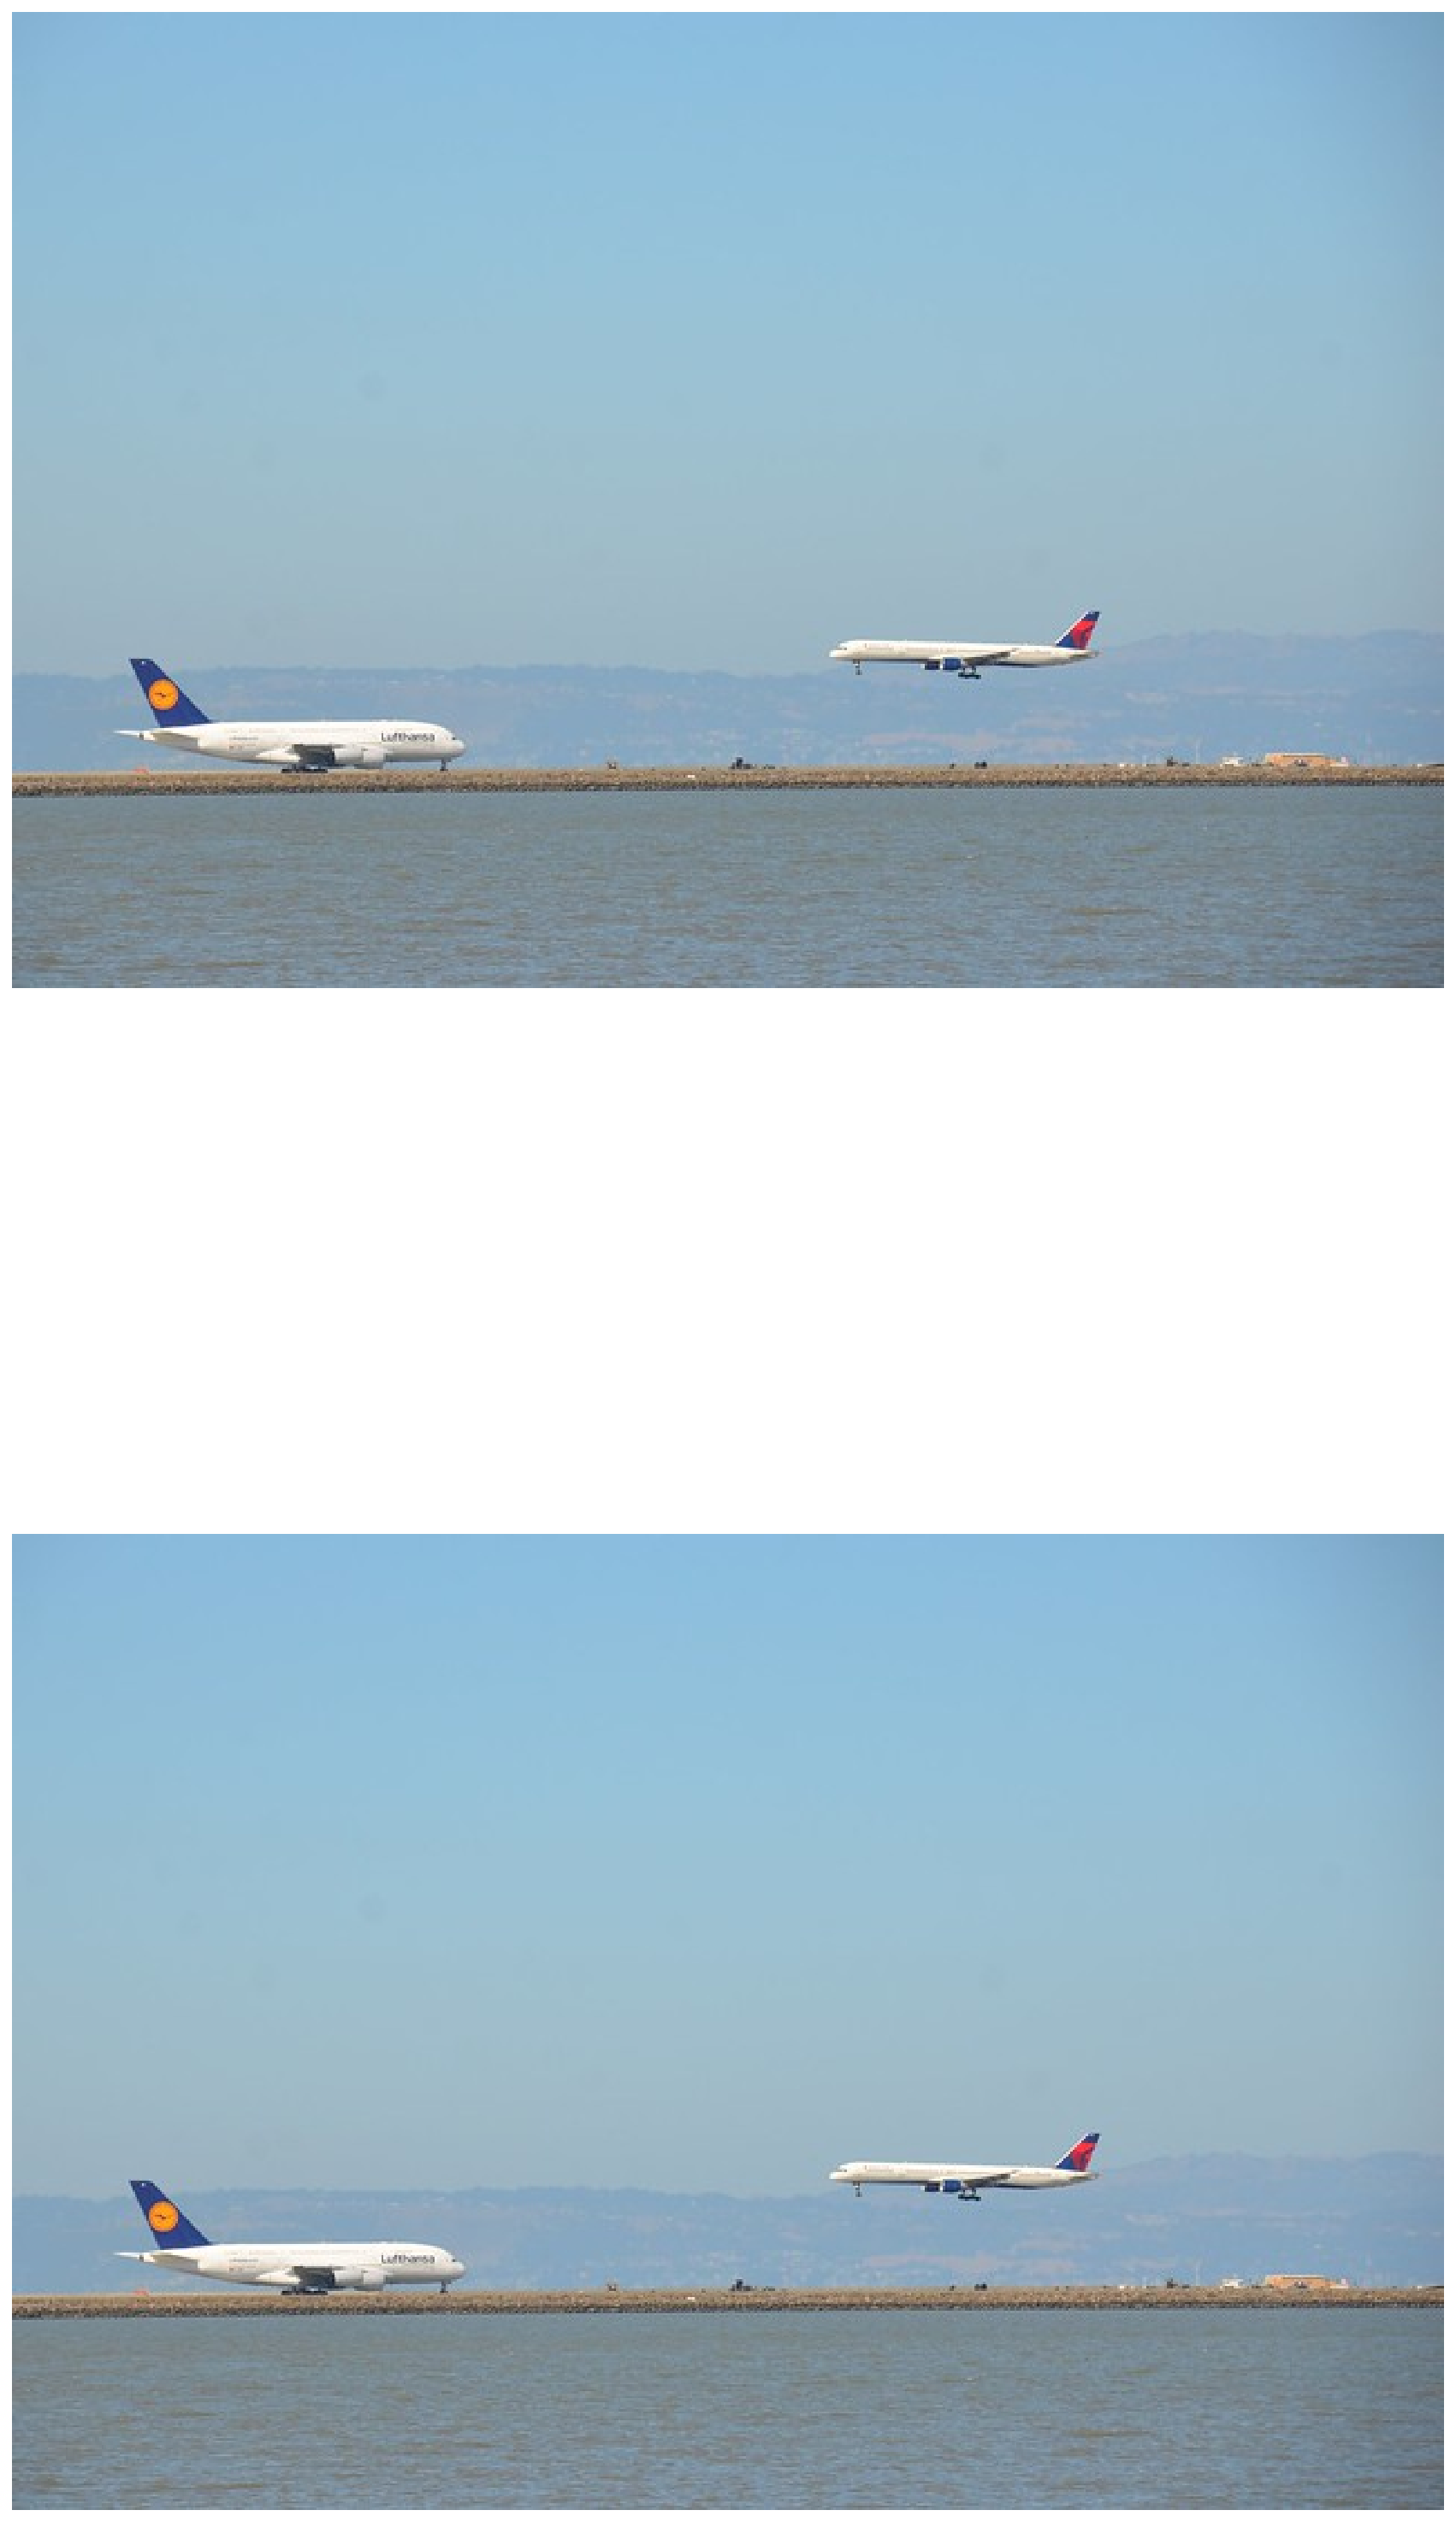

In [3]:
visualize_predictions(dataset_config=config['datasets']['debug'],
                      device=1,
                      samples=2)

In [ ]:
import torchvision
import torch

from torchvision import transforms
from PIL import Image

In [ ]:
device = torch.device(f'cuda:0')

In [1]:
model = torchvision.models.detection.fasterrcnn_resnet50_fpn(pretrained=True, progress=False)
model.to(device)

model

FasterRCNN(
  (transform): GeneralizedRCNNTransform()
  (backbone): BackboneWithFPN(
    (body): IntermediateLayerGetter(
      (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (bn1): FrozenBatchNorm2d()
      (relu): ReLU(inplace=True)
      (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (layer1): Sequential(
        (0): Bottleneck(
          (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): FrozenBatchNorm2d()
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): FrozenBatchNorm2d()
          (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn3): FrozenBatchNorm2d()
          (relu): ReLU(inplace=True)
          (downsample): Sequential(
            (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
            (1): FrozenBatchNorm2d()
          )
  

In [2]:
x = [torch.rand(3, 300, 400), torch.rand(3, 500, 400)]
x = [m.to(device) for m in x]

with torch.no_grad():
    model.eval()
    prediction = model(x)
    
print(prediction)

[{'boxes': tensor([], device='cuda:0', size=(0, 4)), 'labels': tensor([], device='cuda:0', dtype=torch.int64), 'scores': tensor([], device='cuda:0')}, {'boxes': tensor([], device='cuda:0', size=(0, 4)), 'labels': tensor([], device='cuda:0', dtype=torch.int64), 'scores': tensor([], device='cuda:0')}]


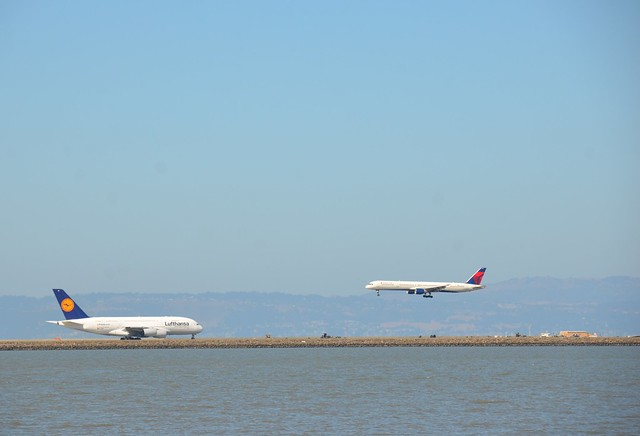

In [4]:
image = Image.open('/data/ssd/datasets/airdetect/debug/debug1.jpg')
image

In [13]:
image_tensor = transforms.ToTensor()(image)
image_tensor = image_tensor.to(device)
image_tensor

tensor([[[0.5176, 0.5176, 0.5176,  ..., 0.4588, 0.4549, 0.4549],
         [0.5176, 0.5176, 0.5176,  ..., 0.4588, 0.4549, 0.4549],
         [0.5176, 0.5176, 0.5176,  ..., 0.4588, 0.4549, 0.4549],
         ...,
         [0.4706, 0.4745, 0.4667,  ..., 0.3765, 0.3529, 0.3412],
         [0.4510, 0.4471, 0.4353,  ..., 0.4196, 0.4235, 0.4431],
         [0.4275, 0.4275, 0.4157,  ..., 0.3569, 0.3765, 0.4118]],

        [[0.6980, 0.6980, 0.6980,  ..., 0.6314, 0.6275, 0.6275],
         [0.6980, 0.6980, 0.6980,  ..., 0.6314, 0.6275, 0.6275],
         [0.6980, 0.6980, 0.6980,  ..., 0.6314, 0.6275, 0.6275],
         ...,
         [0.5255, 0.5294, 0.5333,  ..., 0.4235, 0.4000, 0.3882],
         [0.5059, 0.5020, 0.5020,  ..., 0.4667, 0.4706, 0.4902],
         [0.4824, 0.4824, 0.4824,  ..., 0.4039, 0.4235, 0.4588]],

        [[0.8275, 0.8275, 0.8275,  ..., 0.7451, 0.7333, 0.7333],
         [0.8275, 0.8275, 0.8275,  ..., 0.7451, 0.7333, 0.7333],
         [0.8275, 0.8275, 0.8275,  ..., 0.7451, 0.7333, 0.

In [14]:
print(image_tensor.shape)

torch.Size([3, 436, 640])


In [16]:
with torch.no_grad():
    model.eval()
    prediction = model([image_tensor])
    
prediction

[{'boxes': tensor([[ 43.0105, 288.4206, 201.7162, 341.1713],
          [369.2162, 266.8350, 489.8509, 297.6409]], device='cuda:0'),
  'labels': tensor([5, 5], device='cuda:0'),
  'scores': tensor([0.9994, 0.9989], device='cuda:0')}]